# Data CLEANING RT.REVIEWS

## 1.1 Data Overview

The dataset **rt.reviews.tsv** contains movie review data collected from Rotten Tomatoes. It includes metadata such as reviewer information, review content, ratings, freshness labels, publisher names, and publication dates.

### 1.2: Data Description

#### 1.2.1: Importing the dataset

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Reading the dataset and checking top five rows
df= pd.read_csv("../Original_Data/rt.reviews.tsv", sep='\t', encoding='ISO-8859-1')
df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


**The file isn't encoded in UTF-8, As a result, trying to load it normally causes an error. The use of encoding="ISO-8859-1" solved the problem.**

#### 1.2.2: Basic structure

In [3]:
df.shape

(54432, 8)

In [4]:
df.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

#### 1.2.3: Overview of column types and non-null values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


#### 1.2.4: Summary statistics numerical

In [6]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,54432.0,1045.706882,586.657046,3.0,542.0,1083.0,1541.0,2000.0
top_critic,54432.0,0.240594,0.427448,0.0,0.0,0.0,0.0,1.0


#### 1.2.5: Summary statistics categorical

In [7]:
df.describe(include='O').T

,count,unique,top,freq
review,48869,48682,Parental Content Review,24
rating,40915,186,3/5,4327
fresh,54432,2,fresh,33035
critic,51710,3496,Emanuel Levy,595
publisher,54123,1281,eFilmCritic.com,673
date,54432,5963,"January 1, 2000",4303


#### 1.2.6: Missing Values

In [8]:
#missing values as sum
df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

In [9]:
#missing values as mean
df.isnull().mean()*100

id             0.000000
review        10.220091
rating        24.832819
fresh          0.000000
critic         5.000735
top_critic     0.000000
publisher      0.567681
date           0.000000
dtype: float64

#### 1.2.7: Duplicates

In [10]:
df.duplicated().sum()

9

### 1.3: Data Summary

The **RT.Reviews** dataset consists of **54,432 records** and **8 attributes**, capturing movie reviews from **Rotten Tomatoes**.

#### 🔑 Key Columns:
- `review`: The text of the review
- `rating`: Rating values (e.g., `"3/5"`, `"B+"`, etc.)
- `fresh`: Indicates sentiment (`fresh` or `rotten`)
- `critic`: Name of the reviewer
- `publisher`: Source of the review
- `date`: Review publication date

#### 🧹 Data Completeness:
- `rating`: **24.8% missing**
- `review`: **10% missing**
- `critic`: **5% missing**
All other fields (`id`, `fresh`, `top_critic`, `publisher`, `date`) are nearly complete.

#### 📌 Additional Insights:
- **Unique publishers**: `1,281`
- **Unique critics**: `3,496`
- **Top rating value**: `"3/5"`
- **Duplicate records**: `9` (should be removed)
- **`top_critic` field**: Binary (0 or 1), with ~**24%** marked as top critics
- **`date` field**: Spans multiple years and should be converted to datetime for analysis

#### ✅ Next Steps:
- Handle missing values
- Standardize `rating` formats
- Parse `date` into datetime objects
- Remove duplicate records
- Impute or filter out null values in key fields (`review`, `critic`)

In [11]:
for col in df.columns:
    print(f"{col}")
    print(df[col].unique())

id
[   3    5    6 ... 1998 1999 2000]
review
["A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "
 "It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling."
 '... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.'
 ...
 "Despite Besson's high-profile name being Wasabi's big selling point, there is no doubt that Krawczyk deserves a huge amount of the credit for the film's thoroughly winning tone."
 'The film lapses too often into sugary sentiment and withholds delivery on the pell-mell pyrotechnics its punchy style promises.'
 'The real charm of this trifle is the deadpan comic face of its star, Jean Reno, who resembles Sly Stallone in a hot sake 

### 1.4 Data Cleaning

####  Data Cleaning Strategy Summary

To ensure data quality and preserve analytical integrity, we apply the following cleaning rules:

##### Drop Column
- **Column `id`** is just an index with no analytical value -- Decision drop

##### Drop Rows:
- **Missing `rating`**: As the most critical field representing reviewer opinion, rows without a rating are dropped entirely.
- **Less than 5% missing fields**: Any row missing less 5% values is also dropped to reduce imputing and preserve completeness.

##### Impute Missing Values:
- **Missing `review`**: Rows with missing review text are retained but imputed with the placeholder `"Unknown"` to preserve structure for analysis.


In [12]:
df.drop(columns='id', inplace=True)

In [13]:
#creating a list and dropping the rows with null
print(f"Shape Before: {df.shape}")
columns_to_droprows = ['rating','critic', 'publisher']
df.dropna(subset=columns_to_droprows, inplace=True)
print(f"Shape After: {df.shape}")

Shape Before: (54432, 7)
Shape After: (38734, 7)


In [14]:
#Imputing the nan values with UNKNOWN
df['review'].fillna('UNKNOWN', inplace=True)

In [15]:
#checking null values
df.isna().sum()

review        0
rating        0
fresh         0
critic        0
top_critic    0
publisher     0
date          0
dtype: int64

In [16]:
#checking unique values
for col in df.columns:
    print(f"{col}:")
    print(df[col].unique())

review:
["A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse. "
 'Quickly grows repetitive and tiresome, meandering toward messages that land softly, producing little impact.'
 'Cronenberg is not a director to be daunted by a scenario in which the antihero spends most of his time in a stretch limo. Turning it into a film that interests anyone ... is another matter'
 ...
 'Manages to be somewhat well-acted, not badly art-directed and utterly unengaging no matter how hard it tries to be thrilling, touching or, yikes, uproarious.'
 'Arguably the best script that Besson has written in years.'
 "Dawdles and drags when it should pop; it doesn't even have the virtue of enough mindless violence to break up the tedium of all its generational bonding."]
rating:
['3/5' 'C' '2/5' 'B-' '2/4' 'B' '3/4' '4/5' '4/4' '6/10' '1/4' '8' '2.5/4'
 '4/10' '2.0/5' '3/10' '7/10' 'A-' '5/5' 'F' '3

In [17]:
df['date'].dtype

dtype('O')

In [18]:
#Coverting the event.date into a datetime type
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'].dtype

dtype('<M8[ns]')

In [19]:
df['rating'].value_counts()

3/5      4015
3/4      3471
4/5      3394
2/5      2977
2/4      2622
         ... 
8.9         1
3.1/5       1
7.7         1
2.2/5       1
2.3/5       1
Name: rating, Length: 182, dtype: int64

In [20]:
# Defining letter grade mapping
letter_grades = {
    'A+': 10.0, 'A': 9.5, 'A-': 9.0,
    'B+': 8.5, 'B': 8.0, 'B-': 7.5,
    'C+': 7.0, 'C': 6.5, 'C-': 6.0,
    'D+': 5.5, 'D': 5.0, 'D-': 4.5,
    'F+': 4.0, 'F': 3.5, 'F-': 3.0
}


# Normalizing fractional ratings to 10-point scale
def normalize_rating(val):
    try:
        if '/' in val:
            num, den = val.split('/')
            return round(float(num) / float(den) * 10, 2)
        elif val in letter_grades:
            return letter_grades[val]
        else:
            return float(val)
    except:
        return None
df['rating'] = df['rating'].apply(normalize_rating)

In [21]:
df['rating'].value_counts()

8.00     5122
6.00     5008
7.50     4330
5.00     4249
4.00     3260
         ... 
2.30        1
15.00       1
5.40        1
4.60        1
4.33        1
Name: rating, Length: 82, dtype: int64

In [22]:
df.shape

(38734, 7)

Ratings above 10.0 are likely poorly formatted fractions (like '3/2'). We drop them.

In [23]:
#dropping suspicious ratings
df = df[df['rating'] <= 10]
df.shape

(38717, 7)

17 ratings were written incorrectly

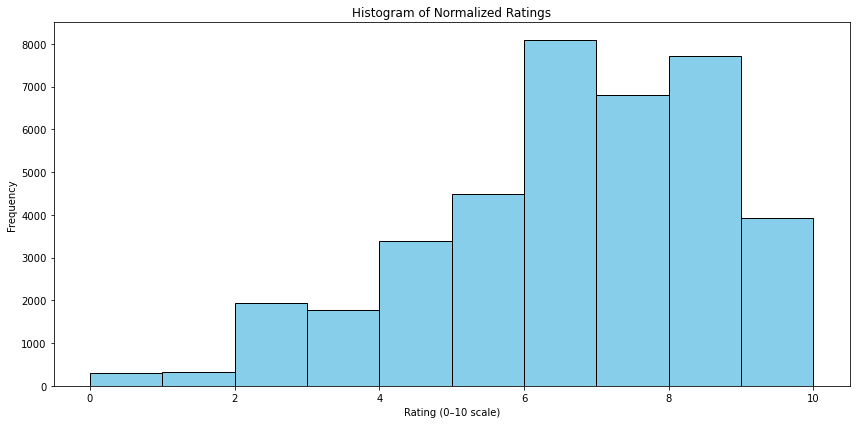

In [24]:
plt.figure(figsize=(12, 6))

plt.hist(df['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Normalized Ratings')
plt.xlabel('Rating (0–10 scale)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [26]:
df['publisher'] = df['publisher'].str.strip().str.lower()